# Analyze target statistics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
# fig_dir = Path('../../fig')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15

In [2]:
# Read target csv
df = pd.read_csv('../../../data/interim/target_list.csv', index_col=0)
df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,7BEJ_L,1.080,2019-08-21T00:00:00Z,>7bej_L mol:protein length:214 COVOX-158 ligh...,DIVMTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...,214,14576,1970,True
1,6AXS_A,1.314,2020-01-08T00:00:00Z,>6axs_A mol:protein length:231 HIV-1 capsid p...,PIVQNLQGQMIHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEG...,231,3333,29,True
2,6HX8_B,1.090,2018-08-22T00:00:00Z,>6hx8_B mol:protein length:445 Tubulin beta-2...,MREIVHIQAGQCGNQIGAKFWEVISDEHGIDPTGSYHGDSDLQLER...,445,2512,330,True
3,6CNW_A,0.921,2020-07-08T00:00:00Z,>6cnw_A mol:protein length:116 humanized anti...,EVQLVESGGGLVQPGGSLRLSCAASGFTFSTSWMYWLRQAPGKGLE...,116,2423,414,True
4,7N1F_B,1.050,2019-04-10T00:00:00Z,>7n1f_B mol:protein length:100 Beta-2-microgl...,MIQRTPKIQVYSRHPAENGKSNFLNCYVSGFHPSDIEVDLLKNGER...,100,2057,358,True
...,...,...,...,...,...,...,...,...,...
6781,7RT0_A,1.850,2019-02-20T00:00:00Z,>7rt0_A mol:protein length:421 4-methylaminob...,MGRIGILGAGLAGLAAATKLAEAGENVTVFEARNRPGGRVWSETLD...,421,1,1,False
6782,6VHF_A,2.490,2019-10-09T00:00:00Z,>6vhf_A mol:protein length:223 PHD-type domai...,ALTPEEYAELTASAETRSKLSEQIALCRQMLQLIELAIARREAAIA...,223,1,1,False
6783,6Q64_A,1.581,2018-12-19T00:00:00Z,>6q64_A mol:protein length:364 Endoglycosidase,MKLLKYLCIGISALSILSCSDWTSEEREVFENQEGMHRLIPLIEAQ...,364,1,1,False
6784,6R3V_A,1.785,2020-02-05T00:00:00Z,>6r3v_A mol:protein length:439 Rho GTPase-act...,MDPLSELQDDLTLDDTSEALNQLKLASIDEKNWPSDEMPDFPKSDD...,439,1,1,False


In [3]:
df['is_similar_AF2'] = ['True' if x == True else 'False' for x in df['is_similar_AF2']]

In [4]:
# Number of sequences included in the AF2 training data in the cluster
df['num_sequence_in_cluster_included_AF2'] = df['num_entry_in_cluster'] - df['num_entry_in_cluster_AF2_notInclude']

## Show target distribution

<AxesSubplot:xlabel='length'>

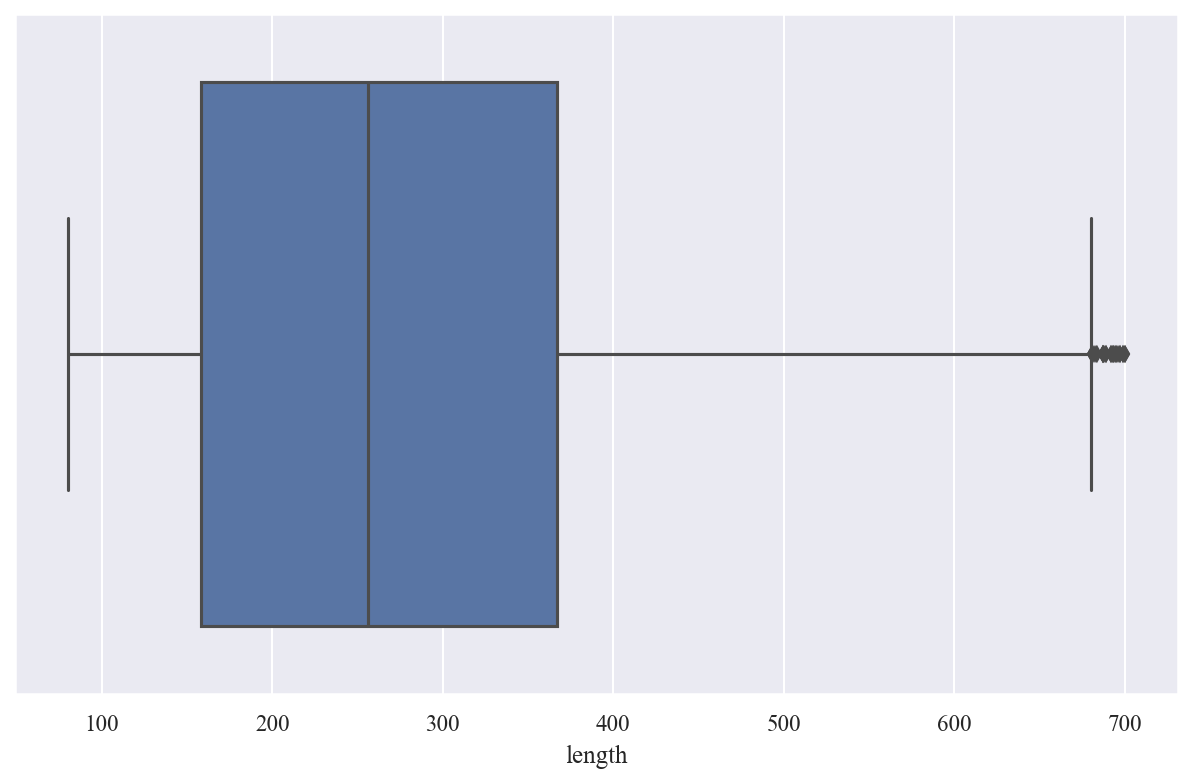

In [5]:
# Sequence length
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='length')

<AxesSubplot:xlabel='length', ylabel='is_similar_AF2'>

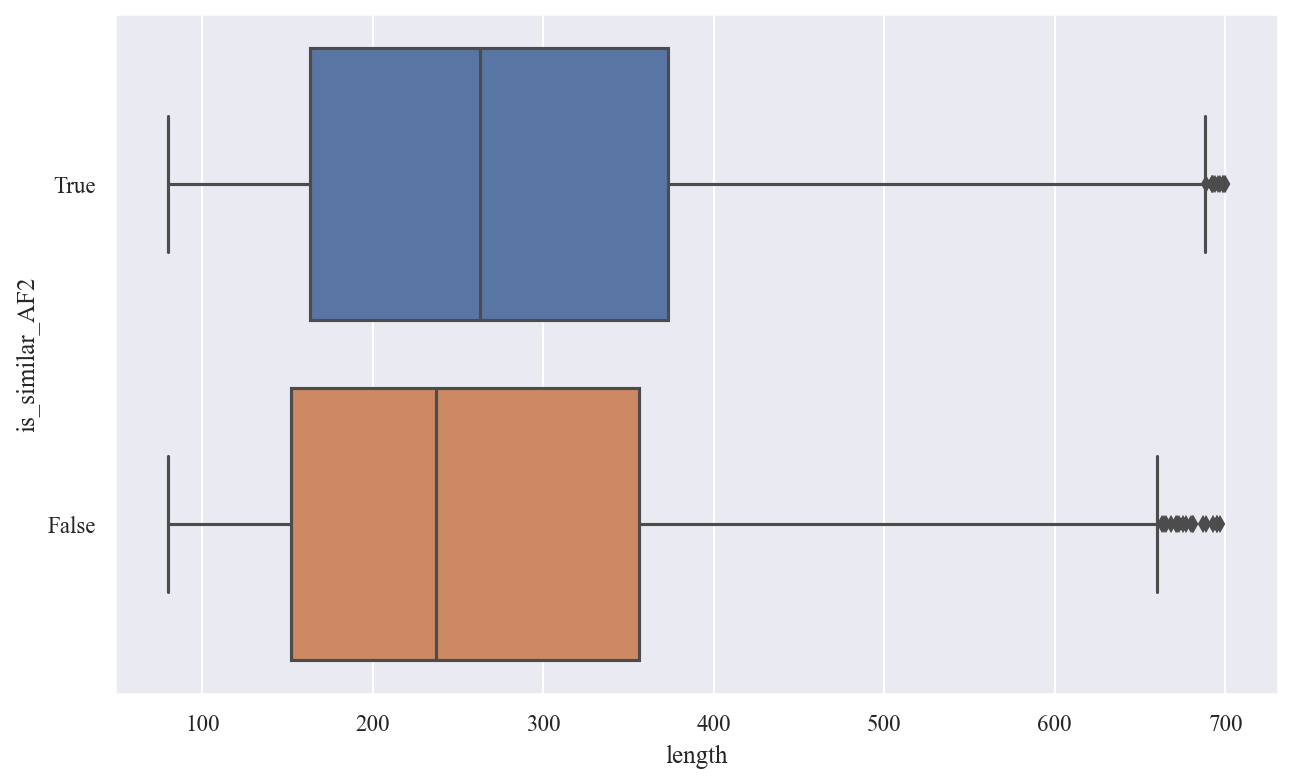

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='length', y='is_similar_AF2')

<AxesSubplot:xlabel='resolution'>

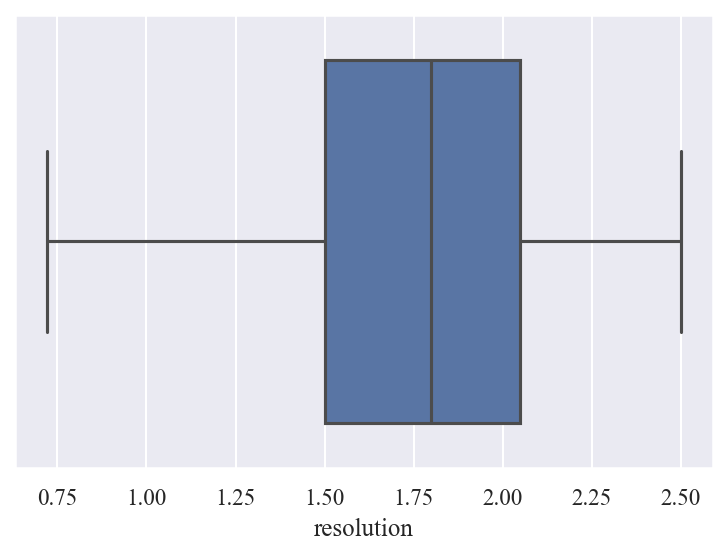

In [7]:
# Resolution
sns.boxplot(data=df, x='resolution')

<AxesSubplot:xlabel='resolution', ylabel='is_similar_AF2'>

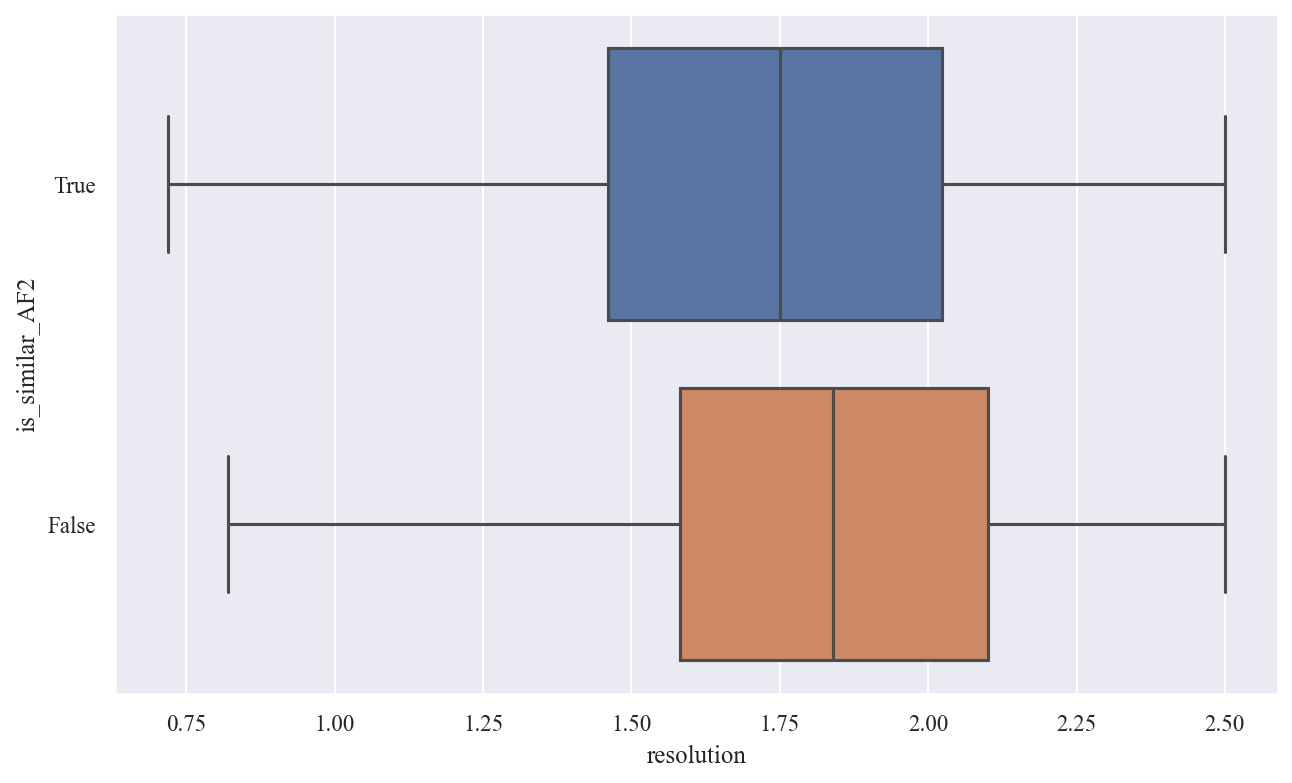

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='resolution', y='is_similar_AF2')

<AxesSubplot:xlabel='is_similar_AF2', ylabel='count'>

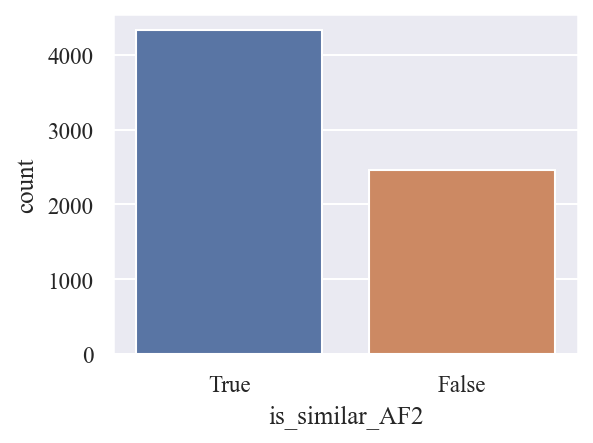

In [9]:
# Target number that have similar sequence to AF2 training dataset and not
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='is_similar_AF2')

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_entry_in_cluster'>

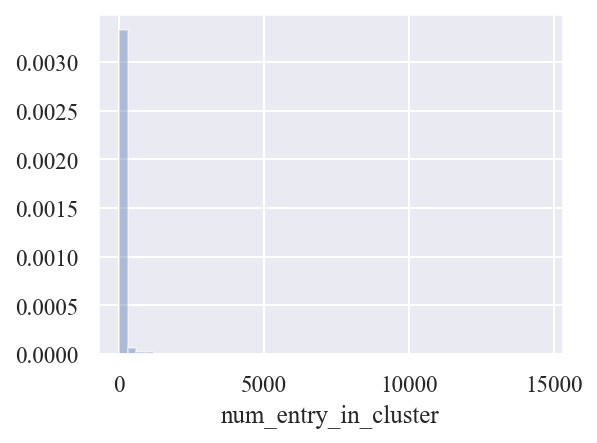

In [10]:
plt.figure(figsize=(4, 3))
sns.distplot(df['num_entry_in_cluster'], kde=False, norm_hist=True)

<AxesSubplot:xlabel='num_sequence_in_cluster_included_AF2'>

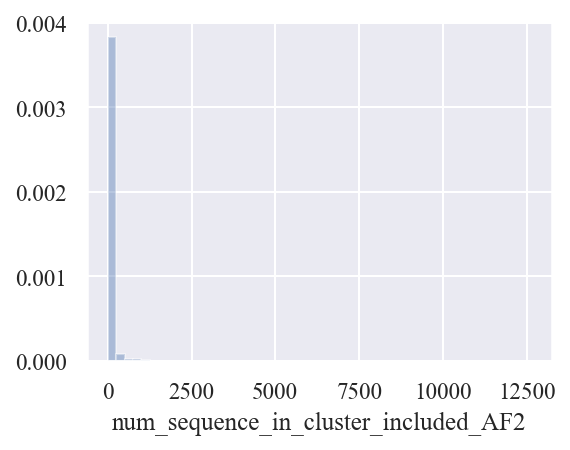

In [11]:
plt.figure(figsize=(4, 3))
sns.distplot(df['num_sequence_in_cluster_included_AF2'], kde=False, norm_hist=True)

## Sampling targets

In [12]:
df['is_similar_AF2'].value_counts()

True     4331
False    2455
Name: is_similar_AF2, dtype: int64

In [13]:
similar_df = df[df['is_similar_AF2'] == 'True']
non_similar_df = df[df['is_similar_AF2'] == 'False']

In [14]:
random_state = 0
target_num = 100
df_sample = df.sample(target_num, random_state=random_state)
display(df_sample)
df_sample['is_similar_AF2'].value_counts()

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2,num_sequence_in_cluster_included_AF2
3691,6F4J_A,1.450,2018-08-15T00:00:00Z,>6f4j_A mol:protein length:176 Probable U2 sm...,MVKLTPELINQSMQYINPVRERELDLRGYKIPQIENLGATLDQFDT...,176,7,4,True,3
2147,7NN4_A,1.500,2019-10-02T00:00:00Z,>7nn4_A mol:protein length:402 Acetylornithin...,GSMTGASTTTATMRQRWQAVMMNNYGTPPIALASGDGAVVTDVDGR...,402,19,12,True,7
4270,6K3B_B,2.000,2021-07-28T00:00:00Z,>6k3b_B mol:protein length:108 Uncharacterize...,GSHMFFKDYQKKNVMRLLQDSLEKIINEWLKTDDESHTKLKSLQEL...,108,5,1,True,4
6224,6OSX_A,1.470,2020-10-14T00:00:00Z,>6osx_A mol:protein length:168 Protein YmbA,ETKSYYQLPLMAQVGTQSTASQGNRLLWVEQVAVPDYLAGNGVVYQ...,168,1,1,False,0
737,6VK6_B,1.550,2021-03-03T00:00:00Z,>6vk6_B mol:protein length:395 Methane monoox...,MSQPQSSQVTKRGLTDPERAAIIAAAVPDHALDTQRKYHYFIQPRW...,395,76,16,True,60
...,...,...,...,...,...,...,...,...,...,...
3567,7OBP_A,1.850,2020-06-10T00:00:00Z,>7obp_A mol:protein length:168 NCOA7-AS,GMRPHSALLENMHIEQLARRLPARVQGYPWRLAYSTLEHGTSLKTL...,168,7,6,True,1
98,6XHV_1p,1.570,2019-06-12T00:00:00Z,>6xhv_1p mol:protein length:88 30S ribosomal ...,MVKIRLARFGSKHNPHYRIVVTDARRKRDGKYIEKIGYYDPRKTTP...,88,554,4,True,550
6636,6QLC_A,2.300,2020-05-20T00:00:00Z,>6qlc_A mol:protein length:104 ssDNA binding ...,GPLGSMALVKKNQARNTQATDNKGASAYLNFHFPTRDGKDVRLVSL...,104,1,1,False,0
4490,6NAU_A,1.590,2021-01-13T00:00:00Z,>6nau_A mol:protein length:334 6-phosphogluco...,SNAMKQTVYTASPESQQIHVWSLEADGKLTLVQVVDAPGQVQPMVV...,334,4,3,True,1


True     67
False    33
Name: is_similar_AF2, dtype: int64

<AxesSubplot:xlabel='length'>

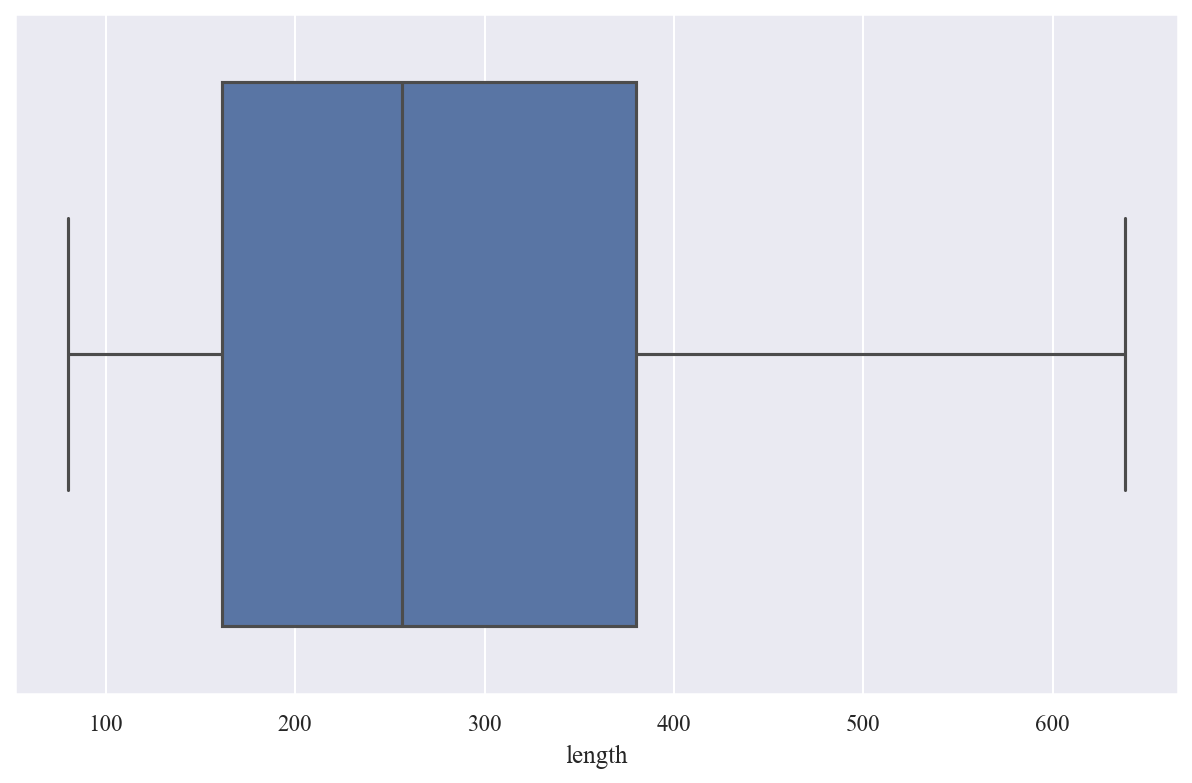

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x='length')

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_entry_in_cluster'>

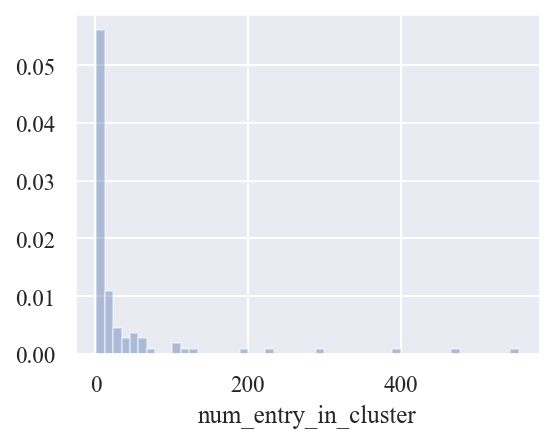

In [16]:
plt.figure(figsize=(4, 3))
sns.distplot(df_sample['num_entry_in_cluster'], kde=False, norm_hist=True)

In [17]:
# Equalize the number of targets that have similar sequence to AF2 training data and have not.
similar_sample = similar_df.sample(target_num // 2, random_state=random_state)
non_similar_sample = non_similar_df.sample(target_num // 2, random_state=random_state)
df_eq_sample = pd.concat([similar_sample, non_similar_sample])
df_eq_sample

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2,num_sequence_in_cluster_included_AF2
5370,6EW1_A,2.472,2021-04-07T00:00:00Z,>6ew1_A mol:protein length:291 Filamin-A,SMCNPSACRAVGRGLQPKGVRVKETADFKVYTKGAGSGELKVTVKG...,291,2,1,True,1
3747,7CCM_A,2.282,2020-08-05T00:00:00Z,>7ccm_A mol:protein length:183 Bcl-2-like pro...,MGSSHHHHHHSSGLVPRGSHMKSSQTFEEQTECIVNTLLMDFLSPT...,183,6,3,True,3
2171,6JFK_A,2.030,2020-04-22T00:00:00Z,">6jfk_A mol:protein length:438 Mitofusin-2,cD...",GPHMGGSAEVNASPLKHFVTAKKKINGIFEQLGAYIQESATFLEDT...,438,19,3,True,16
555,5Z2R_A,2.430,2018-08-01T00:00:00Z,>5z2r_A mol:protein length:556 2-succinyl-5-e...,MSVSAFNRRWAAVILEALTRHGVRHICIAPGSRSTPLTLAAAENSA...,556,106,24,True,82
2417,6K5G_A,1.600,2019-04-10T00:00:00Z,>6k5g_A mol:protein length:309 Uridine phosph...,MGMAYQNTNAMPTHSDGTVLHLGLRAGQVANRIVSVGSLGRAKVLA...,309,16,12,True,4
...,...,...,...,...,...,...,...,...,...,...
5286,5QU5_A,1.130,2019-08-28T00:00:00Z,>5qu5_A mol:protein length:99 Cytoplasmic pro...,MGHHHHHHHHHHSGGLNDIFEAQKIEWHEGSENLYFQSMAEEVVVV...,99,2,2,False,0
4048,6P7L_A,1.820,2021-04-07T00:00:00Z,>6p7l_A mol:protein length:172 Aln2,MTTDETTTTDATTITDATTIADATTRNAPKLPSPELYVEVTQFYAR...,172,6,6,False,0
4172,5Z4Y_A,2.000,2018-06-20T00:00:00Z,>5z4y_A mol:protein length:89 Cys regulon tra...,SMKLQQLRYIWEVAHHDLNVSATAQSLYTSQPGISKQIRLLEDELG...,89,5,5,False,0
6002,6HCZ_A,2.410,2020-10-14T00:00:00Z,>6hcz_A mol:protein length:199 Sjoegren syndr...,MALNGAEVDDFSWEPPTEAETKVLQARRERQDRISRLMGDYLLRGY...,199,2,2,False,0


<AxesSubplot:xlabel='length'>

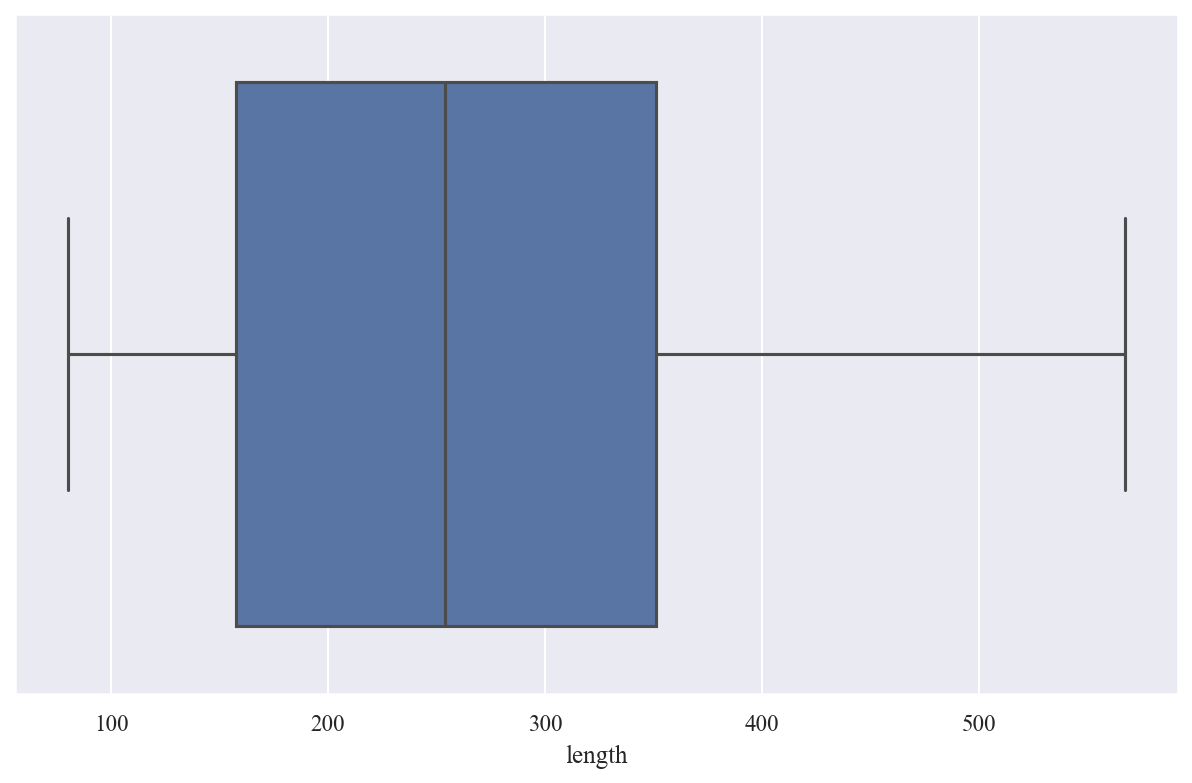

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_eq_sample, x='length')

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_entry_in_cluster'>

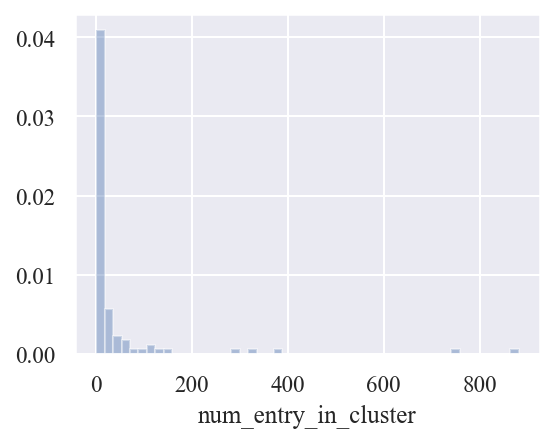

In [19]:
plt.figure(figsize=(4, 3))
sns.distplot(df_eq_sample['num_entry_in_cluster'], kde=False, norm_hist=True)